## Black Friday EDA and Feature Engineering

https://www.kaggle.com/sdolezel/black-friday

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import time
import datatable as dt

%matplotlib inline

In [2]:
%%time

train_df= dt.fread('archive.zip/train.csv').to_pandas()
train_df.head()

Wall time: 447 ms


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,False,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,False,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,False,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,False,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,False,8,NaN,NaN,7969


In [3]:
test_df= dt.fread('archive.zip/test.csv').to_pandas()
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,True,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,False,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,True,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,True,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,False,4,5.0,12.0


In [4]:
# Merge train and test datasets
df = train_df.append(test_df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int32  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int32  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  bool   
 8   Product_Category_1          783667 non-null  int32  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: bool(1), float64(3), int32(3), object(5)
memory usage: 63.5+ MB


In [6]:
df.describe()

,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.drop(['User_ID'], axis=1, inplace=True)

In [8]:
df.sample()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
59884,P00085242,M,36-45,0,B,1,False,8,14.0,17.0,7876.0


In [9]:
# Handling categorical feature Gender
# df['Gender'] = pd.get_dummies(['Gender'], drop_first=True)
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,False,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,False,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,False,12,NaN,NaN,1422.0


In [10]:
# Handle categorical feature Age
# df['Age'].nunique()
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
# First technique
df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5,
                           '51-55':6, '55+':4})

In [12]:
# # Second technique
# # Import label encoder
# from sklearn import preprocessing
 
# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()
 
# # Encode labels in column 'species'.
# df['Age']= label_encoder.fit_transform(df['Age'])
 
# df['Age'].unique()

# In this case, not the best as train and test data has been merged

In [13]:
# Handle City_Category
df_city = pd.get_dummies(df['City_Category'], drop_first=True)

In [14]:
df = pd.concat([df, df_city], axis=1)

In [15]:
 df.drop('City_Category', axis=1, inplace=True)

In [16]:
df.head(3)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,False,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,False,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,False,12,NaN,NaN,1422.0,0,0


### Missing values

In [17]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [18]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [19]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [20]:
# Best for this features will be replace missing values with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [21]:
df['Product_Category_2'].isnull().sum()

0

In [22]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [24]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [25]:
#
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [26]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

<ipython-input-26-ec94367881b2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')


In [27]:
df.head()


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,False,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,False,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,False,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,False,12,14.0,16.0,1057.0,0,0
4,P00285442,1,4,16,4,False,8,8.0,16.0,7969.0,0,1


In [28]:
df.drop('Product_ID', axis=1, inplace=True)

In [29]:
# Convert bool into int
df['Marital_Status'] = df['Marital_Status'].astype('int16')

In [30]:
# Convert object into int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int32')

In [31]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int32
Stay_In_Current_City_Years      int32
Marital_Status                  int16
Product_Category_1              int32
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
dtype: object

In [32]:
for col in ['B', 'C']:
    df[col] = df[col].astype(int)
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int32
Stay_In_Current_City_Years      int32
Marital_Status                  int16
Product_Category_1              int32
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int32
C                               int32
dtype: object

### Visualizetion

In [33]:
# sns.pairplot(df)

C:\Users\vikto\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

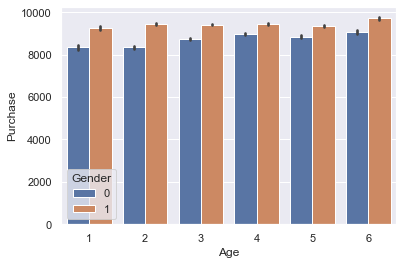

In [34]:
# Age vs Purchase with respect to Gender
sns.barplot('Age', 'Purchase', hue='Gender', data=df)

Observations: men purchases is higher over women purchases

C:\Users\vikto\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

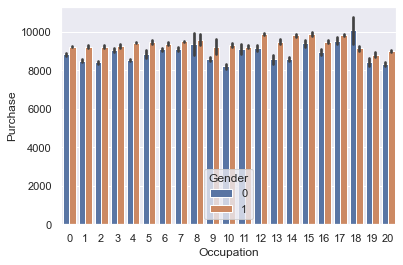

In [35]:
# Purchase vs Occupation
sns.barplot('Occupation', 'Purchase', hue='Gender', data=df)

C:\Users\vikto\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

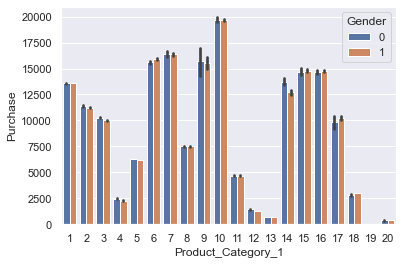

In [36]:
# Product_Category_1
sns.barplot('Product_Category_1', 'Purchase', hue='Gender', data=df)

C:\Users\vikto\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

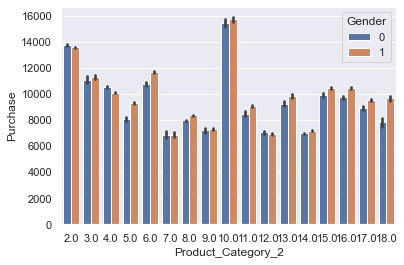

In [37]:
# Product_Category_2
sns.barplot('Product_Category_2', 'Purchase', hue='Gender', data=df)

C:\Users\vikto\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

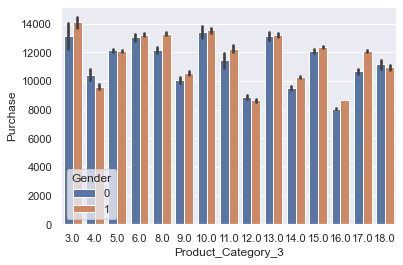

In [38]:
# Product_Category_3
sns.barplot('Product_Category_3', 'Purchase', hue='Gender', data=df)

### Feature Scaling

In [39]:
df_test = df[df['Purchase'].isnull()]

In [40]:
df_train = df[~df['Purchase'].isnull()]

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
df_train.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [44]:
scaler = StandardScaler()

X = df_train[['Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'B', 'C']]
y = df_train['Purchase']


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((368545, 10), (181523, 10), (368545,), (181523,))

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)